SRAG 2021 e 2022 - Banco de Dados de Síndrome Respiratória Aguda Grave - incluindo dados da COVID-19

Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import io
import requests
from sklearn.feature_selection import chi2
import scipy.stats as stats
from sklearn import metrics
import seaborn as sn

Datasets

In [3]:
df_original = pd.read_csv('df_preprocessed.csv', delimiter=',')

In [4]:
df = df_original.copy(deep = True)
df.drop(columns=['Unnamed: 0'], inplace= True)

CONSTANTS

In [5]:
DICT_PADRAO = {1: 'Yes', 2: 'Not', 9: 'Ignored'}
FAIXA_PADRAO = ['Yes','Not']

Mapping dictionaries

In [6]:
Clinical_features = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA']

for column in Clinical_features:
    df[column] = df[column].map(DICT_PADRAO)

**Table 2: Clinical features of SARS-CoV-2 infection among pregant and postpartum women, by SARS-COV-2 VOCs in Brazil.**

In [7]:
def plot_and_test_relationship(df, label, variable, alpha=0.05):
    # Create a DataFrame for plotting
  
    plot_df = pd.DataFrame(index=label)

    # Count the number of people for each variant by disease
    for variant in df['VARIANTE_COVID'].unique():
        variant_counts = df[df['VARIANTE_COVID'] == variant].loc[df[variable] != 'Ignored'].groupby(variable).size()
        plot_df[variant] = variant_counts

    variant_names = {1: 'Gamma', 2: 'Delta', 3: 'Omicron'}
    plot_df.rename(columns=variant_names, inplace=True)

    # Plot the grouped bar chart
    ax = plot_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribution of COVID-19 Variants by {variable}')
    plt.xlabel(variable)
    plt.ylabel('Number of Samples')
    plt.legend(title='COVID Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")
    plt.show()

    # Add 'Total' column
    plot_df['Total'] = plot_df.sum(axis=1)

    # Add 'Total' row
    plot_df.loc['Total'] = plot_df.sum()

    percentage_df = plot_df.copy()
    # Add percentage columns
    for variant in ['Gamma', 'Delta', 'Omicron']:
        percentage_df[variant + '_Percentage'] = (percentage_df[variant] / percentage_df.loc['Total'][variant] * 100).round(2).astype(str) + '%'

    column_order = ['Gamma', 'Gamma_Percentage', 'Delta', 'Delta_Percentage', 'Omicron', 'Omicron_Percentage', 'Total']
    percentage_df = percentage_df[column_order]
    display(percentage_df)

    chi_square = 0
    columns = plot_df.iloc[:,0:3].columns
    rows = plot_df.iloc[0:3].index

    for i in columns:
        for j in rows:
            O = plot_df[i][j]  # observed value
            E = plot_df[i]['Total'] * plot_df['Total'][j] / plot_df['Total']['Total']  # expected frequency
            chi_square += (O - E) ** 2 / E

    p_value = 1 - stats.chi2.cdf(chi_square, (len(rows) - 1) * (len(columns) - 1))

    print(f'H₀: The two categorical variables ({variable} and VARIANTE_COVID) have no relationship')
    print(f'p-value: {p_value}\n')
    conclusion = "Failed to reject the null hypothesis."
    if p_value <= alpha:
        conclusion = "Null Hypothesis is rejected."
    print(conclusion)

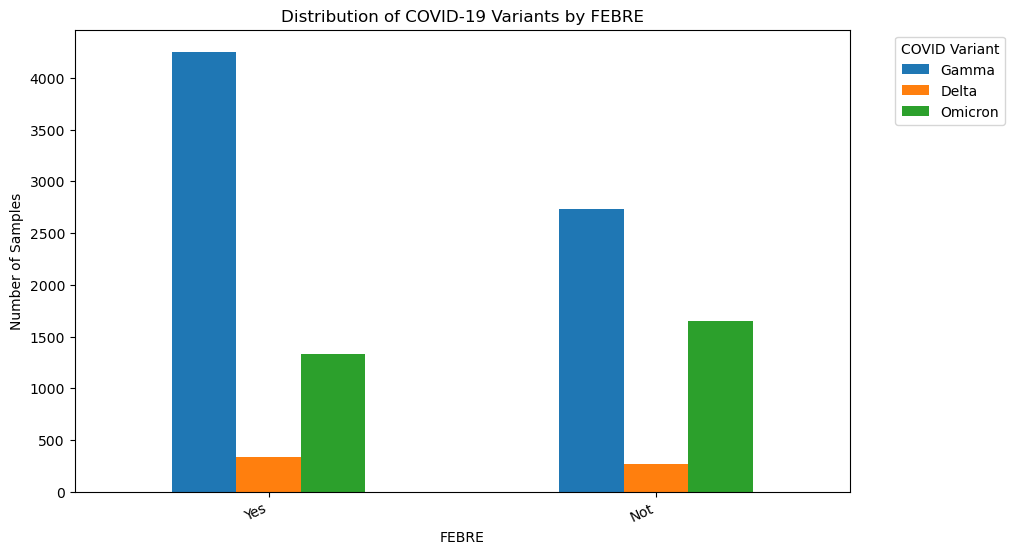

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,4252,60.91%,332,55.7%,1335,44.68%,5919
Not,2729,39.09%,264,44.3%,1653,55.32%,4646
Total,6981,100.0%,596,100.0%,2988,100.0%,10565


H₀: The two categorical variables (FEBRE and VARIANTE_COVID) have no relationship
p-value: 0.0

Null Hypothesis is rejected.





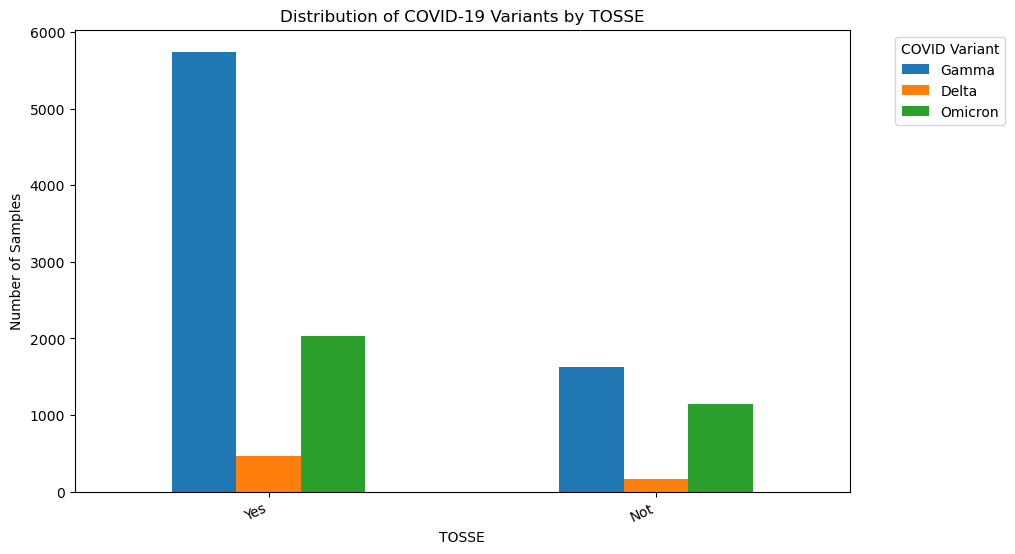

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,5741,77.91%,460,73.48%,2031,63.99%,8232
Not,1628,22.09%,166,26.52%,1143,36.01%,2937
Total,7369,100.0%,626,100.0%,3174,100.0%,11169


H₀: The two categorical variables (TOSSE and VARIANTE_COVID) have no relationship
p-value: 0.0

Null Hypothesis is rejected.





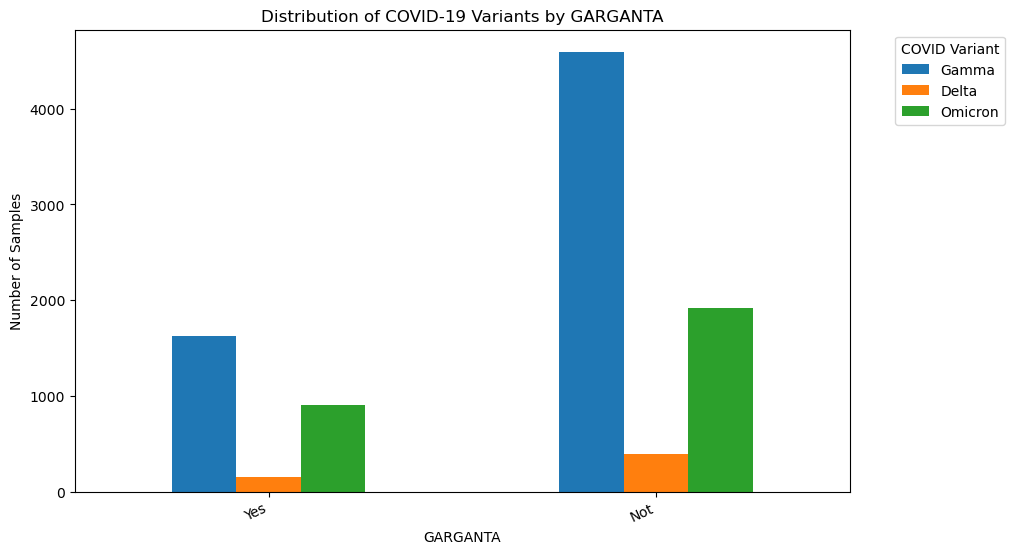

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,1624,26.11%,152,27.84%,907,32.07%,2683
Not,4595,73.89%,394,72.16%,1921,67.93%,6910
Total,6219,100.0%,546,100.0%,2828,100.0%,9593


H₀: The two categorical variables (GARGANTA and VARIANTE_COVID) have no relationship
p-value: 6.573659959707712e-07

Null Hypothesis is rejected.





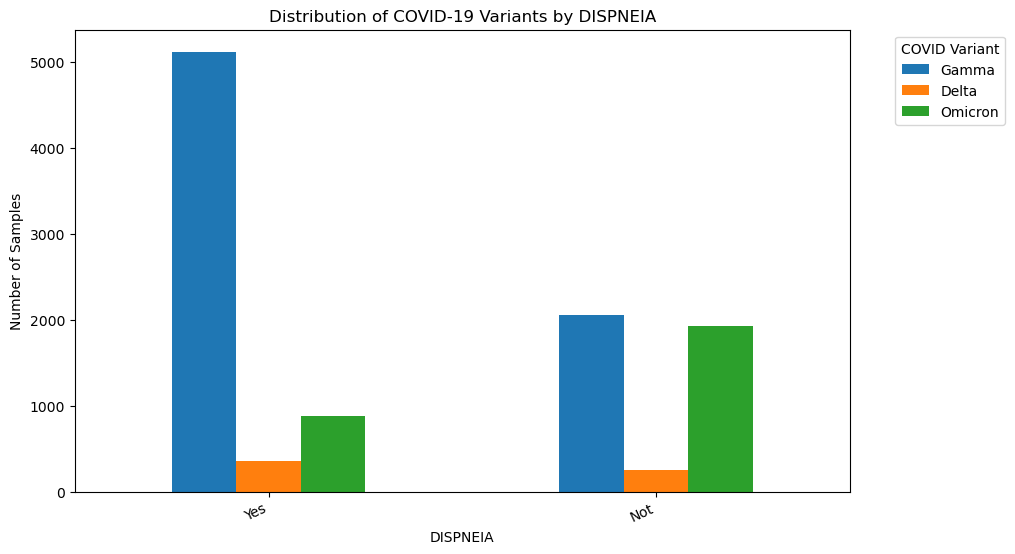

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,5120,71.3%,354,58.42%,886,31.53%,6360
Not,2061,28.7%,252,41.58%,1924,68.47%,4237
Total,7181,100.0%,606,100.0%,2810,100.0%,10597


H₀: The two categorical variables (DISPNEIA and VARIANTE_COVID) have no relationship
p-value: 0.0

Null Hypothesis is rejected.





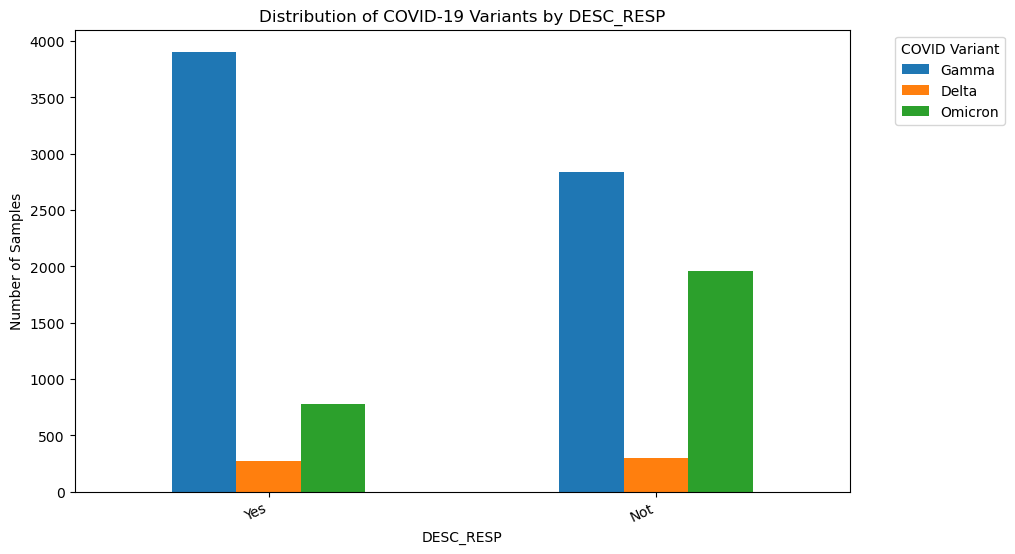

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,3906,57.9%,274,47.65%,782,28.49%,4962
Not,2840,42.1%,301,52.35%,1963,71.51%,5104
Total,6746,100.0%,575,100.0%,2745,100.0%,10066


H₀: The two categorical variables (DESC_RESP and VARIANTE_COVID) have no relationship
p-value: 0.0

Null Hypothesis is rejected.





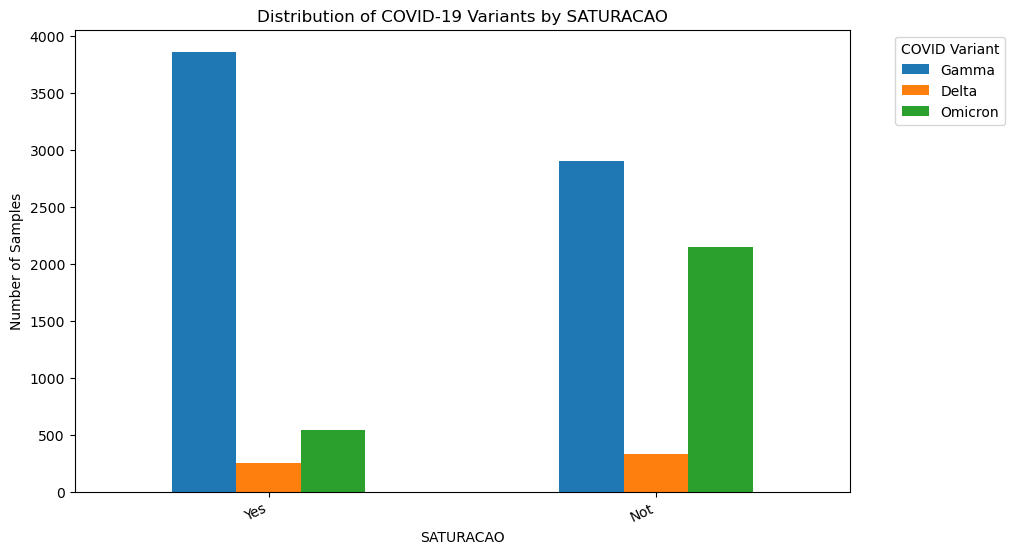

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,3861,57.06%,254,43.12%,542,20.15%,4657
Not,2905,42.94%,335,56.88%,2148,79.85%,5388
Total,6766,100.0%,589,100.0%,2690,100.0%,10045


H₀: The two categorical variables (SATURACAO and VARIANTE_COVID) have no relationship
p-value: 0.0

Null Hypothesis is rejected.





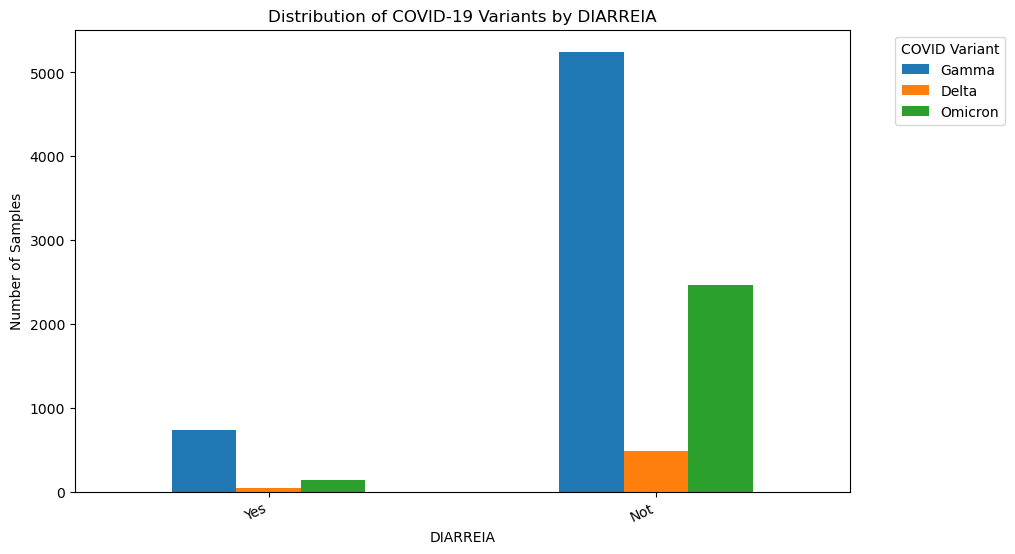

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,739,12.35%,47,8.83%,143,5.49%,929
Not,5247,87.65%,485,91.17%,2462,94.51%,8194
Total,5986,100.0%,532,100.0%,2605,100.0%,9123


H₀: The two categorical variables (DIARREIA and VARIANTE_COVID) have no relationship
p-value: 0.0

Null Hypothesis is rejected.





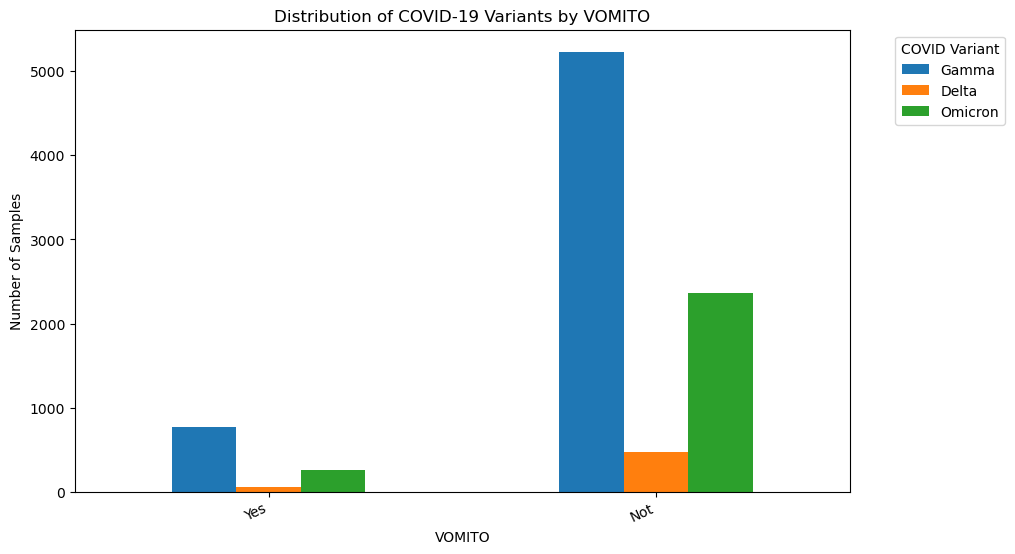

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,769,12.81%,53,10.02%,264,10.03%,1086
Not,5232,87.19%,476,89.98%,2368,89.97%,8076
Total,6001,100.0%,529,100.0%,2632,100.0%,9162


H₀: The two categorical variables (VOMITO and VARIANTE_COVID) have no relationship
p-value: 0.003972244005346015

Null Hypothesis is rejected.





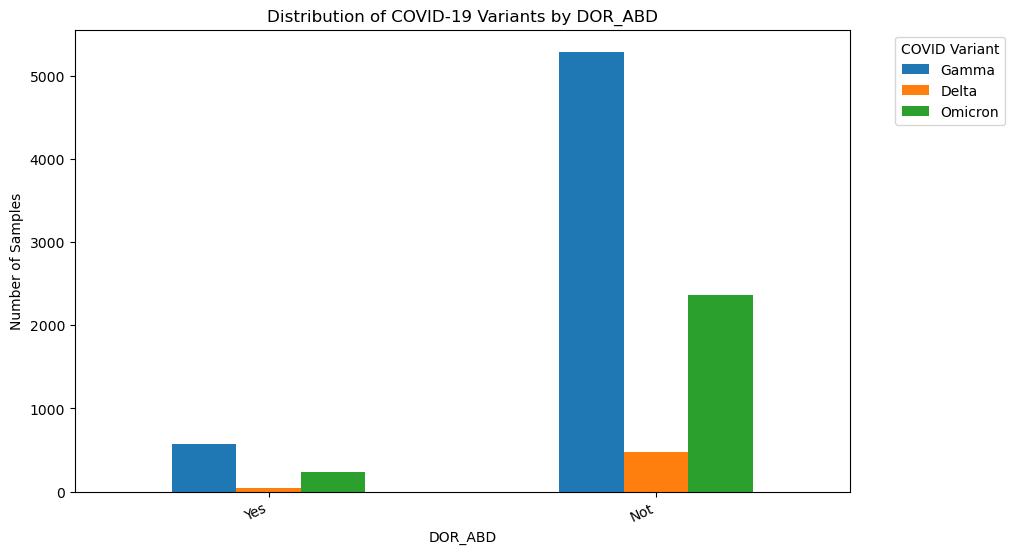

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,574,9.8%,43,8.22%,241,9.25%,858
Not,5286,90.2%,480,91.78%,2365,90.75%,8131
Total,5860,100.0%,523,100.0%,2606,100.0%,8989


H₀: The two categorical variables (DOR_ABD and VARIANTE_COVID) have no relationship
p-value: 0.781255267693797

Failed to reject the null hypothesis.





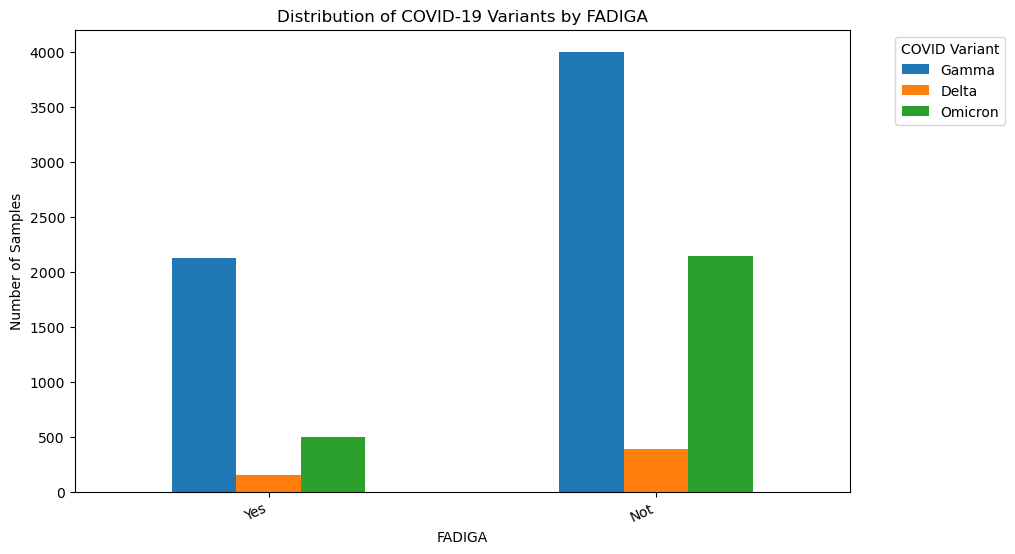

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,2132,34.73%,149,27.64%,496,18.75%,2777
Not,4006,65.27%,390,72.36%,2149,81.25%,6545
Total,6138,100.0%,539,100.0%,2645,100.0%,9322


H₀: The two categorical variables (FADIGA and VARIANTE_COVID) have no relationship
p-value: 0.0

Null Hypothesis is rejected.





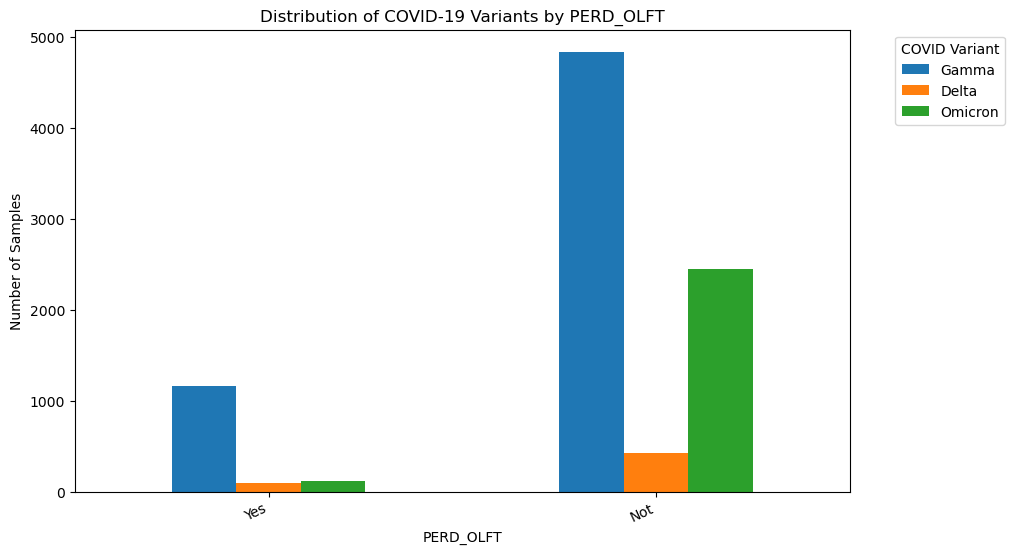

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,1163,19.37%,100,19.16%,123,4.78%,1386
Not,4842,80.63%,422,80.84%,2448,95.22%,7712
Total,6005,100.0%,522,100.0%,2571,100.0%,9098


H₀: The two categorical variables (PERD_OLFT and VARIANTE_COVID) have no relationship
p-value: 0.0

Null Hypothesis is rejected.





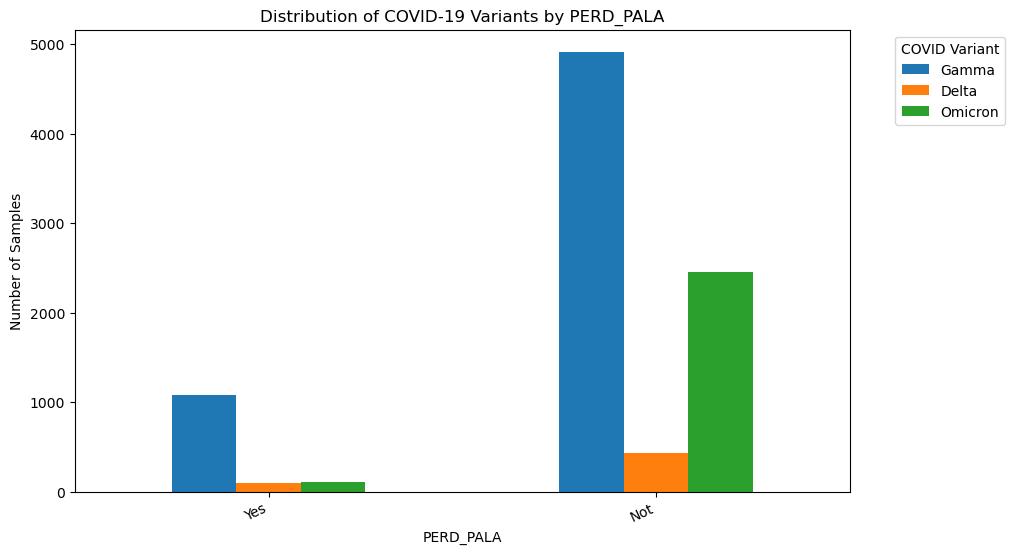

,Gamma,Gamma_Percentage,Delta,Delta_Percentage,Omicron,Omicron_Percentage,Total
Yes,1086,18.09%,96,18.29%,112,4.37%,1294
Not,4917,81.91%,429,81.71%,2451,95.63%,7797
Total,6003,100.0%,525,100.0%,2563,100.0%,9091


H₀: The two categorical variables (PERD_PALA and VARIANTE_COVID) have no relationship
p-value: 0.0

Null Hypothesis is rejected.





In [8]:
for features in Clinical_features:
    plot_and_test_relationship(df, FAIXA_PADRAO, features)
    print('\n\n')